In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

# data loading
(X_train, Y_train), (X_test, Y_test) =  cifar10.load_data()

# data preprocessing
X_train = X_train / 255.0
X_test = X_test / 255.0
num_classes=10
Y_train_ = to_categorical(Y_train, num_classes)
Y_test_ = to_categorical(Y_test, num_classes)

170498071/170498071 [==============================] - 2s 0us/step


In [2]:
# model definition
L,W,H,C = X_train.shape
input_shape = [W, H, C] # as a shape of image
def build_model():
    model = models.Sequential()
    # first convolutional layer
    model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu',
                           input_shape=input_shape))
    # second convolutional layer
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    # max-pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    ##### after max-pooling #####
    model.add(layers.Dropout(0.25))

    # 3rd convolutional layer
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    # 4th convolutional layer
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    # max-pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    ## after max-pooling
    model.add(layers.Dropout(0.25))
    
    # Fully connected MLP
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    ##### after the hidden layer of MLP #####
    model.add(layers.Dropout(0.5))
    # output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    # compile
    model.compile(optimizer=optimizers.RMSprop(learning_rate=10e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    # model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    # model check
    model.summary()
    return model

# main loop without cross-validation
import time
starttime=time.time()
num_epochs = 200
model = build_model()
history = model.fit(X_train, Y_train_, validation_split=0.2,
                    epochs=num_epochs, batch_size=32, verbose=0)
train_loss, train_acc = model.evaluate(X_train, Y_train_)
test_loss, test_acc = model.evaluate(X_test, Y_test_)
print('train_acc:', train_acc)
print('test_acc:', test_acc)
print("elapsed time (in sec): ", time.time()-starttime)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        18496     
                                                        

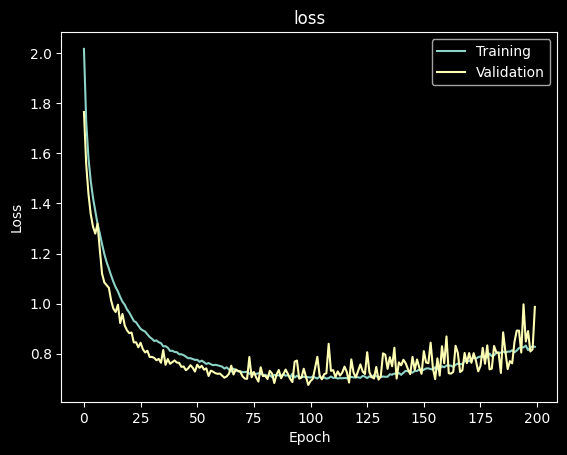

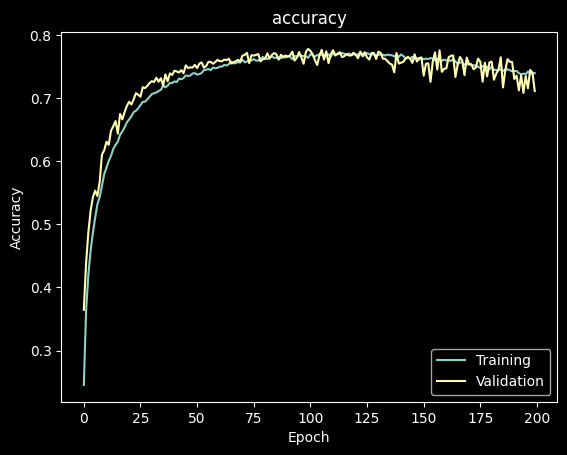

In [3]:
# visualization
def plot_acc(h, title="accuracy"):
    plt.plot(h.history['accuracy'])
    plt.plot(h.history ['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)

def plot_loss(h, title="loss"):
    plt.plot(h.history ['loss'])
    plt.plot(h.history ['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)

plot_loss(history)
# plt.savefig('chapter5-1_cifar10.loss.png')
plt.show()
plot_acc(history)
plt.show()
# plt.savefig('chapter5-1_cifar10.accuracy.png')